# Bank Marketing KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.duplicated().sum()

12

In [6]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

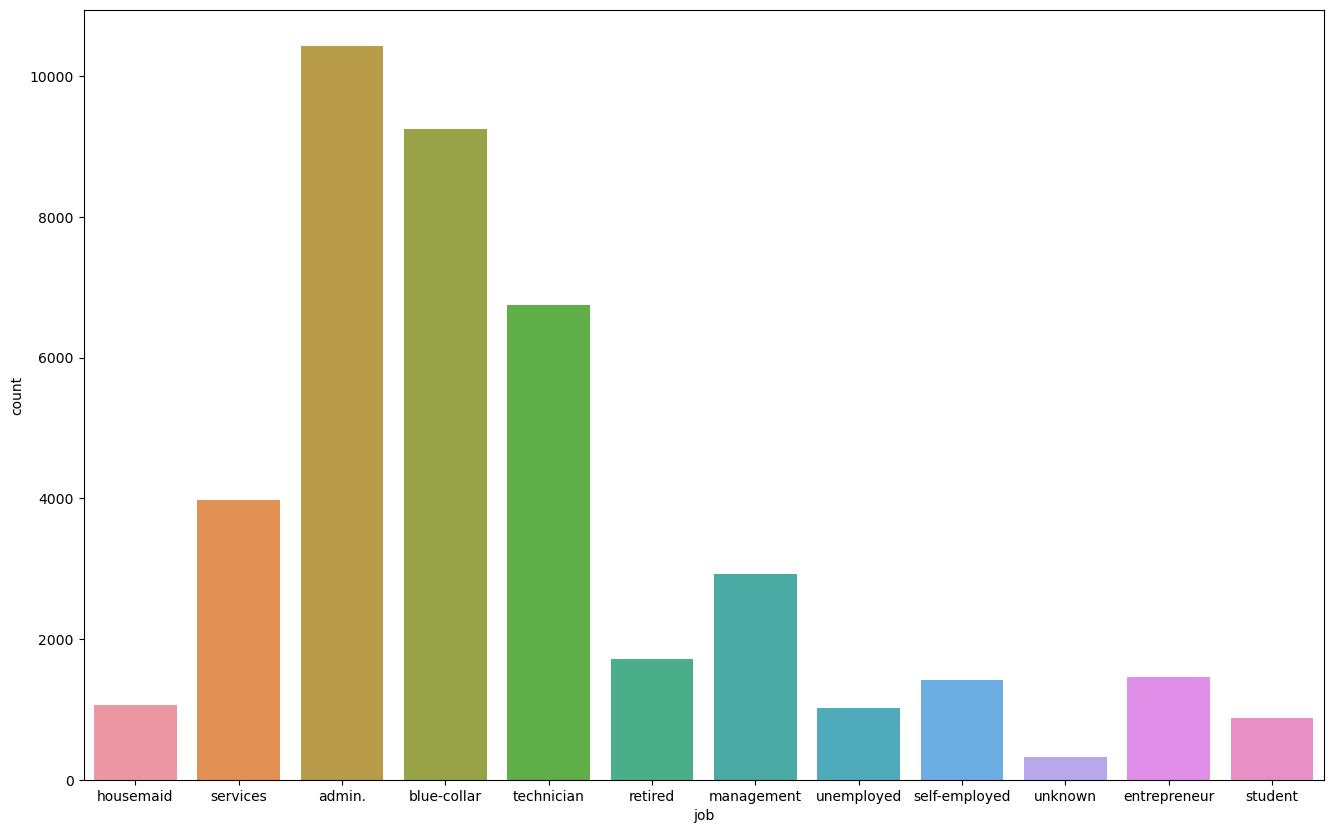

In [8]:
plt.figure(figsize=(16,10))
sns.countplot(data=df,x='job')
plt.show()

In [9]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [10]:
df['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

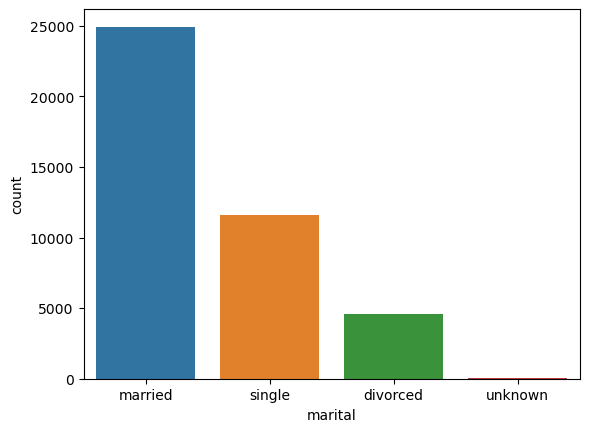

In [11]:
sns.countplot(data=df,x='marital')

<Axes: xlabel='y', ylabel='count'>

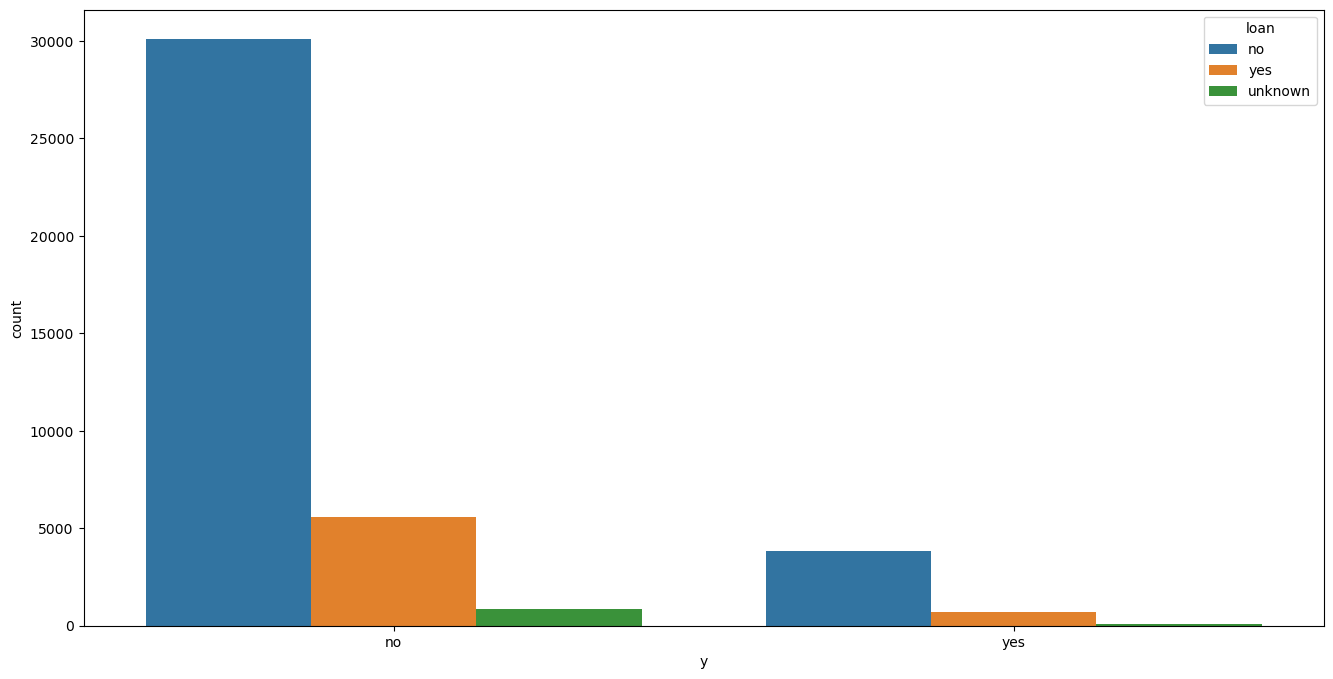

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='y', hue='loan')

In [13]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<Axes: xlabel='housing', ylabel='count'>

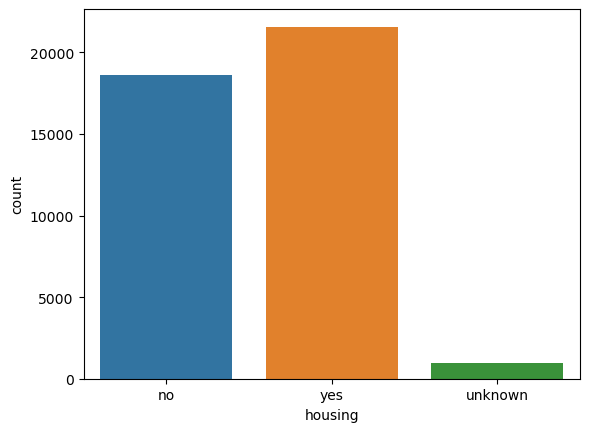

In [14]:
sns.countplot(data=df,x='housing')

In [15]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [16]:
df=df.drop(columns=['marital','education','default','contact','month','day_of_week','campaign','previous','poutcome','age'])
df

,job,housing,loan,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,no,no,261,999,1.1,93.994,-36.4,4.857,5191.0,no
1,services,no,no,149,999,1.1,93.994,-36.4,4.857,5191.0,no
2,services,yes,no,226,999,1.1,93.994,-36.4,4.857,5191.0,no
3,admin.,no,no,151,999,1.1,93.994,-36.4,4.857,5191.0,no
4,services,no,yes,307,999,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,yes,no,334,999,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,blue-collar,no,no,383,999,-1.1,94.767,-50.8,1.028,4963.6,no
41185,retired,yes,no,189,999,-1.1,94.767,-50.8,1.028,4963.6,no
41186,technician,no,no,442,999,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

# Encoding categorical columns

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
job_encoder = LabelEncoder()
housing_encoder = LabelEncoder()
loan_encoder = LabelEncoder()
y_encoder = LabelEncoder()


df['job'] = job_encoder.fit_transform(df['job'])
df['housing'] = housing_encoder.fit_transform(df['housing'])
df['loan'] = loan_encoder.fit_transform(df['loan'])
df['y'] = y_encoder.fit_transform(df['y'])

In [20]:
df

,job,housing,loan,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,0,0,261,999,1.1,93.994,-36.4,4.857,5191.0,0
1,7,0,0,149,999,1.1,93.994,-36.4,4.857,5191.0,0
2,7,2,0,226,999,1.1,93.994,-36.4,4.857,5191.0,0
3,0,0,0,151,999,1.1,93.994,-36.4,4.857,5191.0,0
4,7,0,2,307,999,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,5,2,0,334,999,-1.1,94.767,-50.8,1.028,4963.6,1
41184,1,0,0,383,999,-1.1,94.767,-50.8,1.028,4963.6,0
41185,5,2,0,189,999,-1.1,94.767,-50.8,1.028,4963.6,0
41186,9,0,0,442,999,-1.1,94.767,-50.8,1.028,4963.6,1


In [21]:
X=df.drop(columns='y')
y=df['y']

# Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
df_scaled=scaler.fit_transform(X)
df_scaled

array([[-0.20157925, -1.08770698, -0.45249062, ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 0.91122681, -1.08770698, -0.45249062, ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 0.91122681,  0.94212743, -0.45249062, ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 0.35482378,  0.94212743, -0.45249062, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 1.46762984, -1.08770698, -0.45249062, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.35482378,  0.94212743, -0.45249062, ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [25]:
df_new=pd.DataFrame(df_scaled,columns=X.columns)
df_new

,job,housing,loan,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.201579,-1.087707,-0.452491,0.010471,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
1,0.911227,-1.087707,-0.452491,-0.421501,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
2,0.911227,0.942127,-0.452491,-0.124520,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
3,-1.036184,-1.087707,-0.452491,-0.413787,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
4,0.911227,-1.087707,2.311440,0.187888,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...
41183,0.354824,0.942127,-0.452491,0.292025,0.195414,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,-0.757982,-1.087707,-0.452491,0.481012,0.195414,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,0.354824,0.942127,-0.452491,-0.267225,0.195414,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,1.467630,-1.087707,-0.452491,0.708569,0.195414,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [26]:
df_normalized = pd.concat([y, df_new], axis=1)

In [27]:
df_normalized

,y,job,housing,loan,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,-0.201579,-1.087707,-0.452491,0.010471,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
1,0,0.911227,-1.087707,-0.452491,-0.421501,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
2,0,0.911227,0.942127,-0.452491,-0.124520,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
3,0,-1.036184,-1.087707,-0.452491,-0.413787,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
4,0,0.911227,-1.087707,2.311440,0.187888,0.195414,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0.354824,0.942127,-0.452491,0.292025,0.195414,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0,-0.757982,-1.087707,-0.452491,0.481012,0.195414,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,0,0.354824,0.942127,-0.452491,-0.267225,0.195414,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,1,1.467630,-1.087707,-0.452491,0.708569,0.195414,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_res=df_normalized.drop(columns='y')
y_res=df_normalized['y']

In [30]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3)

# Oversampling

In [32]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3)

# Model Building

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model=KNeighborsClassifier(n_neighbors=5)

In [36]:
model.fit(X_resampled,y_resampled)

KNeighborsClassifier()

In [37]:
y_pred=model.predict(X_test)

In [38]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
acc=accuracy_score(y_test,y_pred)
acc

0.9513464290360348

In [41]:
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      7588
           1       0.91      1.00      0.95      7786

    accuracy                           0.95     15374
   macro avg       0.96      0.95      0.95     15374
weighted avg       0.96      0.95      0.95     15374



In [42]:
confusion=confusion_matrix(y_test,y_pred)

In [43]:
confusion

array([[6845,  743],
       [   5, 7781]], dtype=int64)